#### Leer Excel y procesar hoja "Consumo"

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import shapiro

In [43]:
df_consumo = pd.read_excel(
    './Estadisticas_historicas_comercializacion.xlsx',
    sheet_name='CONSUMO',
    skiprows=6
).rename(columns=lambda x: x.strip())


diesel_cols = [
    'Diesel bajo azufre',
    'Diesel ultra bajo azufre',
    'Diesel alto azufre'
]

df_consumo['Diesel'] = df_consumo[diesel_cols].sum(axis=1)

df_consumo = df_consumo[[
    'Fecha',
    'Gasolina regular',
    'Gasolina superior',
    'Diesel'
]]

#### Leer Excel y procesar hoja "Importación"

In [44]:
df_importacion = pd.read_excel(
    './Estadisticas_historicas_comercializacion.xlsx',
    sheet_name='IMPORTACION',
    skiprows=6
).rename(columns=lambda x: x.strip())

df_importacion['Diesel'] = df_importacion[diesel_cols].sum(axis=1)

df_importacion = df_importacion[[
    'Fecha',
    'Gasolina regular',
    'Gasolina superior',
    'Diesel'
]]

#### Leer Excel y procesar hoja "Importación" - DATOS 2025

In [ ]:
df_importacion_2025 = pd.read_excel(
    './IMPORTACION-HIDROCARBUROS-VOLUMEN-2025-05.xlsx',
    sheet_name='IMPORTACION',
).rename(columns=lambda x: x.strip())

print(df_importacion_2025.columns)

df_importacion_2025.columns = [
    "Fecha",
    "Aceites Lubricantes",
    "Asfalto",
    "Bunker C o Fuel Oil",
    "Ceras",
    "Combustible turbo jet",
    "Diesel bajo azufre",
    "Diesel ultra bajo azufre",
    "Gas Licuado de Petróleo",
    "Gasolina de aviación",
    "Gasolina regular",
    "Gasolina superior",
    "Grasas Lubricantes",
    "Mezclas oleosas",
    "Naftas",
    "Petcoke",
    "Petróleo crudo",
    "Solventes",
    "Total importación"
]

diesel_cols = [
    'Diesel bajo azufre',
    'Diesel ultra bajo azufre',
]

df_importacion_2025['Diesel'] = df_importacion_2025[diesel_cols].sum(axis=1)

df_importacion_2025 = df_importacion_2025[[
    'Fecha',
    'Gasolina regular',
    'Gasolina superior',
    'Diesel'
]]

Index(['Fecha', 'Aceites Lubricantes', 'Asfalto', 'Bunker C o Fuel Oil',
       'Ceras', 'Combustible turbo jet', 'Diesel bajo azufre',
       'Diesel ultra bajo azufre', 'Gas Licuado de Petróleo',
       'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior',
       'Grasas Lubricantes', 'Mezclas oleosas', 'Naftas', 'Petcoke',
       'Petróleo crudo', 'Solventes', 'Total importación'],
      dtype='object')


#### Inspección rápida de los datos

In [46]:
print("CONSUMO:")
print(df_consumo.head())
print("\nIMPORTACIÓN:")
print(df_importacion.head())
print("\nIMPORTACIÓN 2025:")
print(df_importacion_2025.head())

df_consumo = df_consumo.iloc[:-3]
df_importacion = df_importacion.iloc[:-3]
df_importacion_2025 = df_importacion_2025.iloc[:-3]

CONSUMO:
                 Fecha  Gasolina regular  Gasolina superior     Diesel
0  2000-01-01 00:00:00         202645.20          308156.82  634667.06
1  2000-02-01 00:00:00         205530.96          307766.31  642380.66
2  2000-03-01 00:00:00         229499.56          331910.29  699807.25
3  2000-04-01 00:00:00         210680.40          315648.08  586803.98
4  2000-05-01 00:00:00         208164.34          319667.97  656948.20

IMPORTACIÓN:
                 Fecha  Gasolina regular  Gasolina superior     Diesel
0  2001-01-01 00:00:00         177776.50          373963.96  566101.99
1  2001-02-01 00:00:00         123115.99          243091.07  489525.80
2  2001-03-01 00:00:00         161726.42          312084.38  575559.68
3  2001-04-01 00:00:00         127338.74          285054.89  437745.42
4  2001-05-01 00:00:00         168730.19          300913.67  552609.13

IMPORTACIÓN 2025:
                 Fecha  Gasolina regular  Gasolina superior      Diesel
0  2025-01-01 00:00:00         788

#### Colocar como índice Fecha (datetime)


In [47]:
df_consumo.set_index('Fecha', inplace=True)
df_importacion.set_index('Fecha', inplace=True)
df_importacion_2025.set_index('Fecha', inplace=True)

c:\Users\n8nug\Documents\Uni\2doSemestre2025\DS\Lab01-DS\venv\Lib\site-packages\pandas\core\indexes\base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


#### Obtener estadísticas descriptivas (Consumo)

In [48]:
print("=== Estadísticas descriptivas: Consumo ===")
df_consumo.describe()

=== Estadísticas descriptivas: Consumo ===


,Gasolina regular,Gasolina superior,Diesel
count,300.000000,300.000000,3.000000e+02
mean,397478.894458,470248.678849,8.821302e+05
std,219102.049432,113504.653305,2.291115e+05
min,160741.900000,300242.781667,5.076627e+05
25%,215650.312917,383931.904375,6.997895e+05
50%,288193.130000,423319.540000,8.110382e+05
75%,548073.682500,573704.195000,1.053747e+06
max,938086.570000,786598.120000,1.499266e+06


#### Obtener estadísticas descriptivas (Consumo)

In [49]:
print("\n=== Estadísticas descriptivas: Importación ===")
df_importacion.describe()


=== Estadísticas descriptivas: Importación ===


,Gasolina regular,Gasolina superior,Diesel
count,2.880000e+02,2.880000e+02,2.880000e+02
mean,4.129493e+05,4.909544e+05,8.950957e+05
std,2.432627e+05,1.565581e+05,2.939973e+05
min,8.101530e+04,1.702925e+05,2.297647e+05
25%,2.082069e+05,3.693299e+05,6.920462e+05
50%,3.275593e+05,4.813002e+05,8.462861e+05
75%,5.761171e+05,6.083053e+05,1.124961e+06
max,1.141366e+06,1.227174e+06,1.630636e+06


In [50]:
print("\n=== Estadísticas descriptivas: Importación 2025 ===")
df_importacion_2025.describe()


=== Estadísticas descriptivas: Importación 2025 ===


,Gasolina regular,Gasolina superior,Diesel
count,5.000000,5.000000,5.000000e+00
mean,825877.326000,703852.830000,1.398804e+06
std,49814.464888,66837.762184,1.709612e+05
min,785675.370000,643476.900000,1.207205e+06
25%,788005.350000,645188.600000,1.301176e+06
50%,800182.170000,686641.500000,1.336128e+06
75%,857375.760000,747443.530000,1.525643e+06
max,898147.980000,796513.620000,1.623866e+06


#### Skewness y Kurtosis para Consumo

In [51]:
print("\n=== Skewness y Kurtosis: Consumo ===")
print(df_consumo.skew(), "\n", df_consumo.kurtosis())



=== Skewness y Kurtosis: Consumo ===
Gasolina regular     0.844732
Gasolina superior    0.617518
Diesel               0.654711
dtype: float64 
 Gasolina regular    -0.666696
Gasolina superior   -0.769272
Diesel              -0.545561
dtype: float64


<small>

### Análisis del resultado - Consumo

Los valores de skewness (asimetría) muestran que las tres variables tienen una ligera asimetría positiva, lo que significa que hay algunos valores altos que alejan un poco la distribución hacia la derecha. Sin embargo, los valores no son extremos, por lo que las distribuciones siguen siendo relativamente simétricas.

En cuanto a la kurtosis, todos los valores son negativos, indicando que las distribuciones son más "achatadas" que una distribución normal. Esto sugiere que los datos tienden a concentrarse más en los extremos bajos y no en picos marcados en el centro.

Se puede decir que los datos de consumo no muestran distribuciones demasiado sesgadas o con valores extremos, lo cual es bueno para el análisis y modelado.

<small>

#### Skewness y Kurtosis para Importación

In [52]:
print("\n=== Skewness y Kurtosis: Importación ===")
print(df_importacion.skew(), "\n", df_importacion.kurtosis())


=== Skewness y Kurtosis: Importación ===
Gasolina regular     0.709570
Gasolina superior    0.519624
Diesel               0.296232
dtype: float64 
 Gasolina regular    -0.664679
Gasolina superior    0.738332
Diesel              -0.582603
dtype: float64


<small>

### Análisis del resultado - Importación

En la importación, las tres series también presentan asimetría positiva, lo que indica que hay algunos valores altos que mueven la distribución hacia la derecha. Esta tendencia es un poco más marcada en la gasolina regular.

Respecto a la kurtosis, se observa un caso diferente: mientras gasolina regular y diésel tienen valores negativos (distribución achatada), la gasolina superior tiene kurtosis positiva, lo que sugiere una distribución más "picuda", con valores más concentrados cerca del promedio.

</small>

#### Skewness y Kurtosis para Importación 2025

In [53]:
print("\n=== Skewness y Kurtosis: Importación 2025 ===")
print(df_importacion_2025.skew(), "\n", df_importacion_2025.kurtosis())


=== Skewness y Kurtosis: Importación 2025 ===
Gasolina regular     0.918405
Gasolina superior    0.629835
Diesel               0.436149
dtype: float64 
 Gasolina regular    -1.226058
Gasolina superior   -1.576713
Diesel              -1.739484
dtype: float64


<small>

### Análisis del resultado - Dataset de Importación 2025

En 2025, la asimetría positiva sigue presente en los tres combustibles, especialmente en gasolina regular, lo que indica presencia de algunos valores altos que no son tan frecuentes.

Lo más llamativo está en la kurtosis, que es bastante negativa en todos los casos. Esto refleja que las distribuciones son muy planas, es decir, los valores están más dispersos y hay menos concentración cerca del promedio.

Esto podría estar relacionado con cambios de comportamiento en las importaciones durante el año, tal vez por eventos externos como ajustes de demanda o efectos post-pandemia.

</small>

#### Histogramas para los 3 tipos de gasolina de los dataset de Consumo e Importación

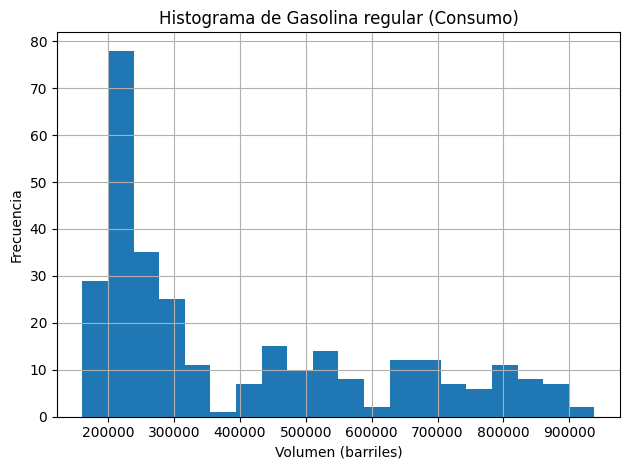

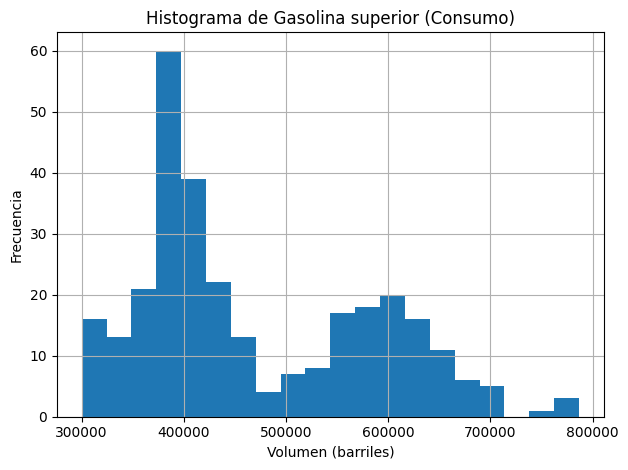

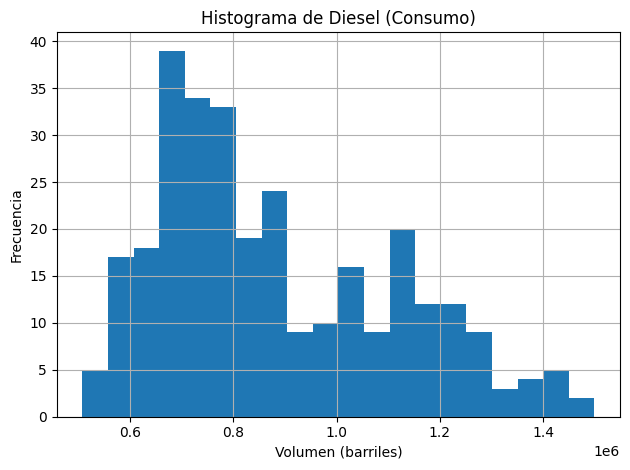

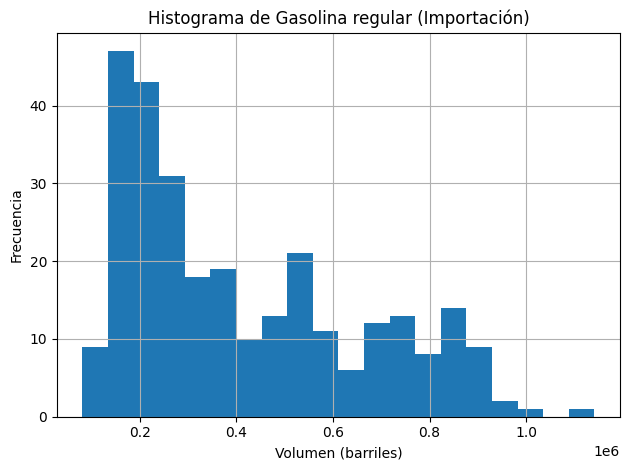

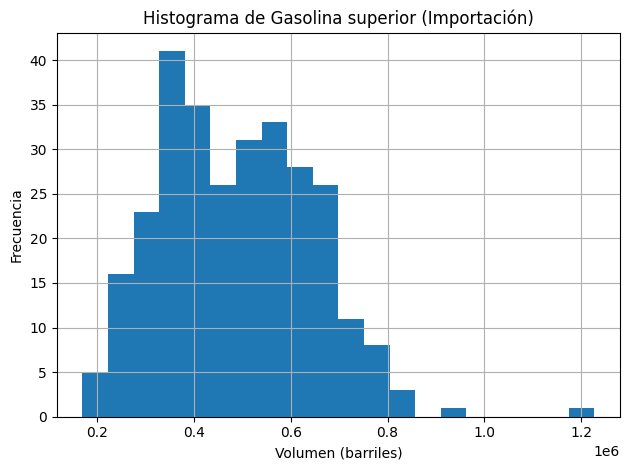

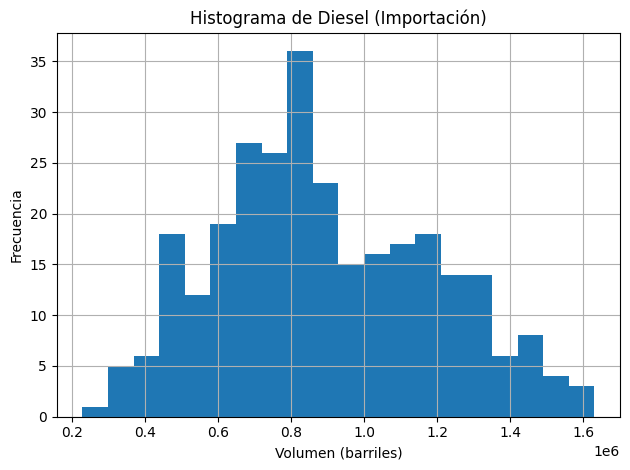

In [54]:
for df, name in [(df_consumo, 'Consumo'), (df_importacion, 'Importación')]:
    for col in [c for c in df.columns if c != 'Fecha']:
        plt.figure()
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col].hist(bins=20)
        plt.title(f'Histograma de {col} ({name})')
        plt.xlabel('Volumen (barriles)')
        plt.ylabel('Frecuencia')
        plt.tight_layout()
        plt.show()



<small>

### Análisis de Resultado de las Histogramas de Consumo

#### Gasolina regular:
Se observa que la mayoría de los valores están concentrados entre 200,000 y 300,000 barriles. Hay una fuerte caída en la frecuencia conforme aumenta el volumen, lo que indica una distribución muy sesgada a la derecha. Es decir, hubo varios meses con consumo bajo y solo algunos con consumos mucho más altos.

#### Gasolina superior:
Aunque también hay una concentración hacia el lado izquierdo (valores menores), esta distribución es un poco más dispersa que la de gasolina regular. Hay varios picos intermedios que podrían reflejar fluctuaciones en el consumo por factores específicos como precio o demanda estacional.

#### Diésel:
Esta distribución es más uniforme que las anteriores, aunque con una leve caída hacia los valores más altos. El consumo de diésel es más estable y con una mayor presencia de meses en rangos altos, lo que tiene sentido si consideramos su uso en transporte y carga pesada.

### Análisis de Resultado de las Histogramas de Importación

#### Gasolina regular:
La mayoría de los valores se concentran en volúmenes bajos, entre 200,000 y 400,000 barriles, y luego la frecuencia cae de forma notable. Esto refuerza la idea de una distribución sesgada a la derecha, donde pocos meses tuvieron importaciones muy altas.

#### Gasolina superior:
Este histograma tiene una forma más equilibrada. Hay una mayor concentración entre los 400,000 y 700,000 barriles, pero también aparecen casos más extremos. Es una distribución más simétrica, aunque aún con una ligera inclinación hacia los valores bajos.

#### Diésel:
La distribución es bastante amplia y simétrica. La mayoría de los valores están entre 600,000 y 1,200,000 barriles, lo que muestra que las importaciones de diésel han sido bastante estables a lo largo del tiempo, sin concentrarse demasiado en valores muy bajos o muy altos.

</small>

#### Tests de Normalidad

In [55]:
print("=== Normality Test for Consumo ===")
for col in df_consumo.columns:
    stat, p = shapiro(df_consumo[col])
    print(f"{col}: W={stat:.3f}, p-value={p:.3f}", end=' ')
    if p > 0.05:
        print(f"-> La variable {col} es normal.")
    else:
        print(f"-> La variable {col} no es normal.")

print("\n=== Normality Test for Importación ===")
for col in df_importacion.columns:
    stat, p = shapiro(df_importacion[col])
    print(f"{col}: W={stat:.3f}, p-value={p:.3f}", end=' ')
    if p > 0.05:
        print(f"-> La variable {col} es normal.")
    else:
        print(f"-> La variable {col} no es normal.")

=== Normality Test for Consumo ===
Gasolina regular: W=0.845, p-value=0.000 -> La variable Gasolina regular no es normal.
Gasolina superior: W=0.913, p-value=0.000 -> La variable Gasolina superior no es normal.
Diesel: W=0.937, p-value=0.000 -> La variable Diesel no es normal.

=== Normality Test for Importación ===
Gasolina regular: W=0.905, p-value=0.000 -> La variable Gasolina regular no es normal.
Gasolina superior: W=0.974, p-value=0.000 -> La variable Gasolina superior no es normal.
Diesel: W=0.982, p-value=0.001 -> La variable Diesel no es normal.


<small>

### Discusión Test de Normalidad

Tanto para el consumo como para la importación, los resultados del test de normalidad (Shapiro-Wilk) muestran que ninguna de las variables sigue una distribución normal, ya que todos los p-values son menores a 0.05.

Aunque algunas variables, como el diésel en importación, se acercan más a la normalidad (por sus valores W más altos), estadísticamente siguen sin cumplir con esta condición. Esto confirma lo visto en los histogramas y en las medidas de skewness y kurtosis: las distribuciones están sesgadas o achatadas, y no tienen forma de campana perfecta.

Esto es importante tenerlo en cuenta si se van a aplicar modelos que asuman normalidad en los datos.

</small>

#### Series temporales para los 3 tipos de gasolina de los dataset de Consumo e Importación


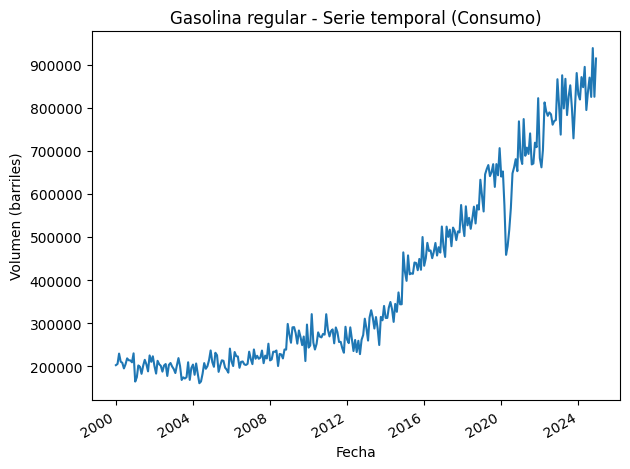

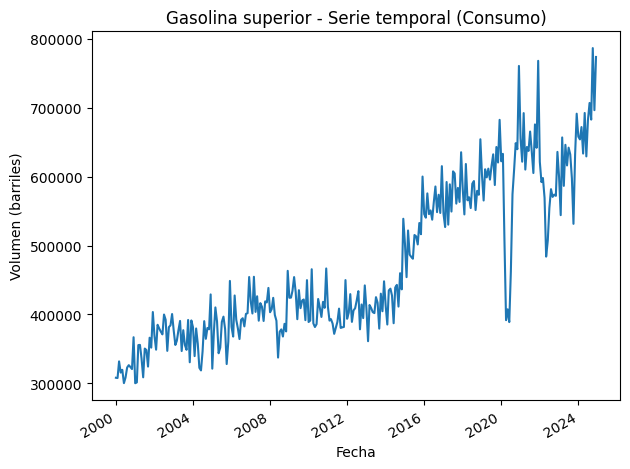

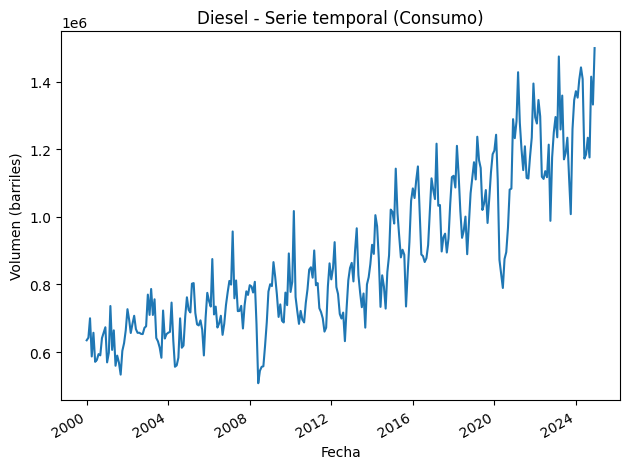

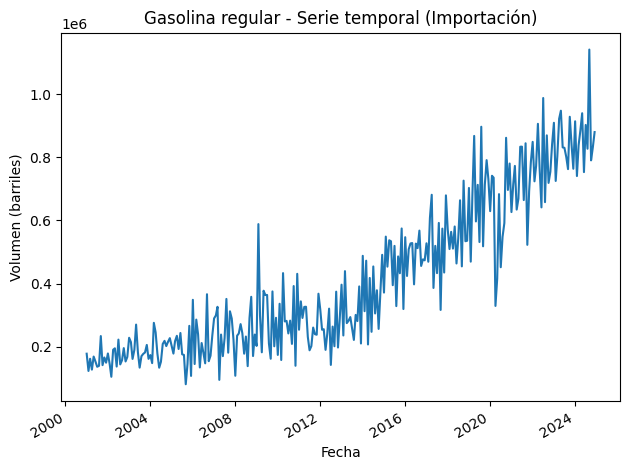

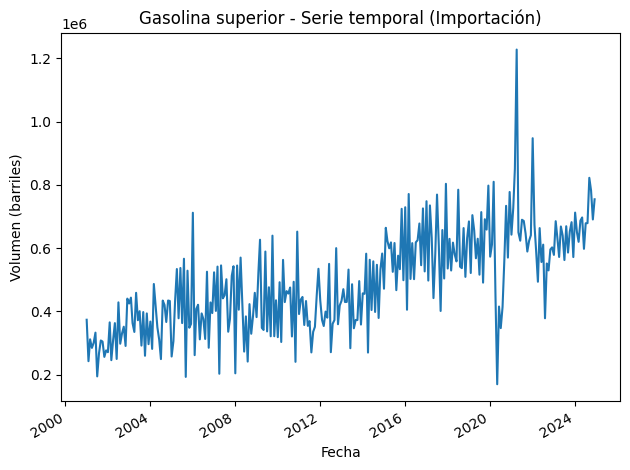

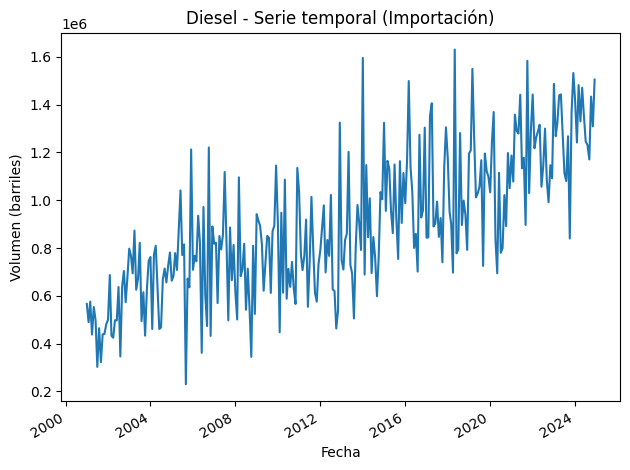

In [56]:
for df_, name in [(df_consumo, 'Consumo'), (df_importacion, 'Importación')]:
    df_.index = pd.DatetimeIndex(df_.index)
    for col in df_.columns:
        fig, ax = plt.subplots()
        ax.plot(df_.index, df_[col])
        ax.set_title(f'{col} - Serie temporal ({name})')
        ax.set_xlabel('Fecha')
        ax.set_ylabel('Volumen (barriles)')
        
        locator = mdates.AutoDateLocator()
        formatter = mdates.ConciseDateFormatter(locator)
        ax.xaxis.set_major_locator(locator)
        ax.xaxis.set_major_formatter(formatter)
        fig.autofmt_xdate()
        
        plt.tight_layout()
        plt.show()


<small>

### Discusión sobre Series Temporales de Consumo 

#### Gasolina regular:
Se observa una clara tendencia creciente a lo largo de los años, especialmente a partir de 2015. Hay un bajón notable cerca de 2020, probablemente relacionado con la pandemia, seguido de una recuperación rápida. En general, el consumo ha ido en aumento.

#### Gasolina superior:
También presenta una tendencia creciente, aunque con más altibajos. Igual que la regular, se nota una caída fuerte en 2020, lo cual confirma el impacto de la pandemia en la demanda. A partir de ahí, el consumo se recupera y sigue creciendo.

#### Diésel:
La serie muestra una tendencia ascendente constante y un patrón estacional claro (subidas y bajadas regulares). También tiene una caída cerca de 2020, aunque menos marcada que en las gasolinas. Esto sugiere que el consumo de diésel fue más resiliente, probablemente por su uso en sectores esenciales.

### Discusión sobre Series Temporales de Importación

#### Gasolina regular:
Hay una tendencia creciente bastante clara, especialmente desde 2015. Se notan varias subidas bruscas, lo que indica cierta inestabilidad o variaciones grandes en algunos meses. Aun así, el patrón general es de aumento sostenido en las importaciones.

#### Gasolina superior:
Aunque también hay una tendencia al alza, esta serie es mucho más volátil. Hay varios picos muy altos, incluyendo uno extremo alrededor de 2021. También se observa una caída repentina en el mismo periodo, probablemente por efectos post-pandemia o ajustes de mercado.

#### Diésel:
La importación de diésel también crece con el tiempo, pero presenta muchas variaciones de un mes a otro. A pesar de eso, el comportamiento general es más estable que el de las gasolinas, con una tendencia creciente bien marcada, lo que podría estar vinculado al uso constante en transporte y logística.

</small>

#### Mes con mayor importación

In [57]:
max_months = {
    col: (df_importacion[col].idxmax().strftime('%Y-%m'), df_importacion[col].max())
    for col in df_importacion.columns
}
print("\n=== Mes con más importaciones por tipo ===")
for tipo, (mes, val) in max_months.items():
    print(f"{tipo}: {mes} ({val:.2f} barriles)")




=== Mes con más importaciones por tipo ===
Gasolina regular: 2024-09 (1141365.94 barriles)
Gasolina superior: 2021-04 (1227173.53 barriles)
Diesel: 2018-05 (1630635.64 barriles)


#### Picos anuales en importación


In [58]:
annual_idx = df_importacion.resample('Y').apply(lambda x: x.idxmax())
peaks = []
for date, row in annual_idx.iterrows():
    year = date.year
    for col in df_importacion.columns:
        peaks.append({'Año': year, 'Tipo': col, 'Mes Pico': row[col].strftime('%Y-%m')})
peaks_df = pd.DataFrame(peaks)
peaks_df


C:\Users\n8nug\AppData\Local\Temp\ipykernel_17792\3796985960.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_idx = df_importacion.resample('Y').apply(lambda x: x.idxmax())


,Año,Tipo,Mes Pico
0,2001,Gasolina regular,2001-09
1,2001,Gasolina superior,2001-01
2,2001,Diesel,2001-03
3,2002,Gasolina regular,2002-07
4,2002,Gasolina superior,2002-12
...,...,...,...
67,2023,Gasolina superior,2023-02
68,2023,Diesel,2023-12
69,2024,Gasolina regular,2024-09
70,2024,Gasolina superior,2024-09


#### Comportamiento últimos 5 años (2020 en adelante)

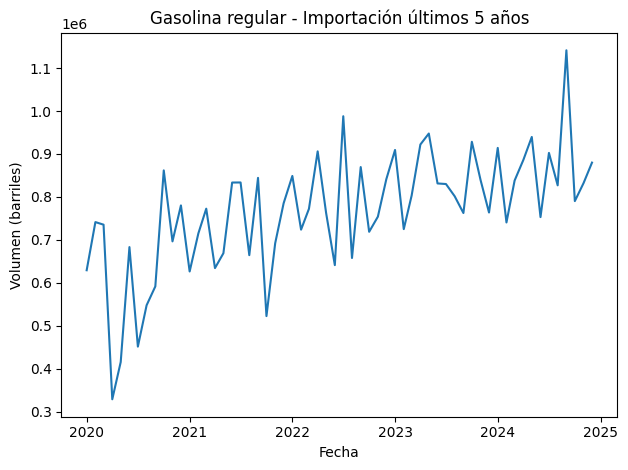

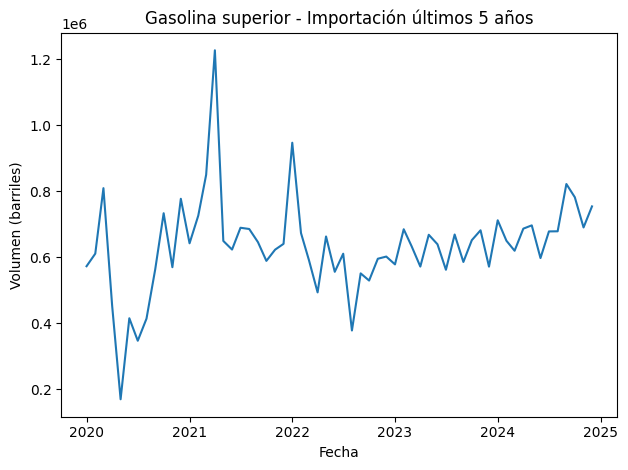

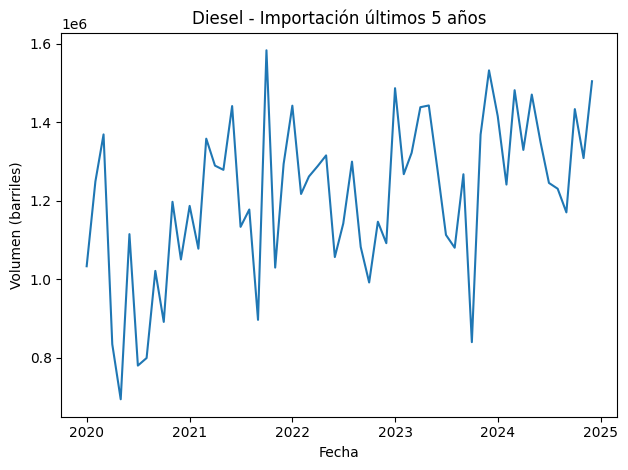

In [59]:
imp_last5 = df_importacion[df_importacion.index >= '2020-01-01']
for col in imp_last5.columns:
    plt.figure()
    plt.plot(imp_last5.index, imp_last5[col])
    plt.title(f'{col} - Importación últimos 5 años')
    plt.xlabel('Fecha')
    plt.ylabel('Volumen (barriles)')
    plt.tight_layout()
    plt.show()



<small>

### Resultados sobre Importación en los últimos 5 años

#### Gasolina regular:
Aunque hay fluctuaciones mes a mes, se nota una tendencia general a mantener volúmenes elevados tras la recuperación de 2020. La presencia de picos sugiere respuestas a cambios de demanda o ajustes en inventarios, pero sin una caída sostenida. Esto puede reflejar una planificación más estable en la importación de este tipo de combustible.

#### Gasolina superior:
Esta serie es la más volátil de las tres. Se observan varios extremos, tanto al alza como a la baja, especialmente entre 2020 y 2022, probablemente por incertidumbre en la demanda tras la pandemia. En los últimos dos años, la importación parece haberse estabilizado en un rango medio, lo que podría indicar una adaptación del mercado a un nuevo patrón de consumo.

#### Diésel:
La importación de diésel muestra volúmenes consistentemente altos, con variaciones frecuentes pero sin caídas prolongadas. Esta estabilidad, junto con una leve tendencia al alza, refleja su importancia constante para sectores como transporte, logística y producción. A pesar de los choques externos, se mantiene como el combustible más prioritario en términos de volumen.

</small>

#### Comportamiento durante pandemia (mar 2020 - dic 2021)

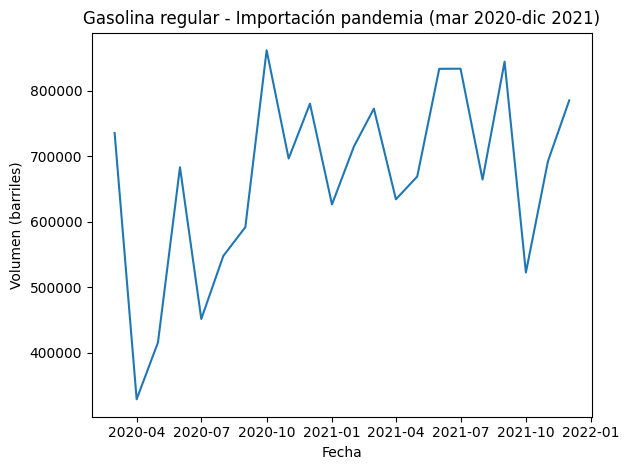

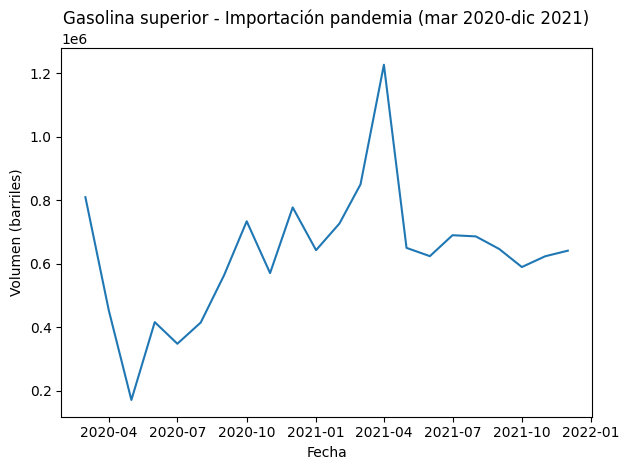

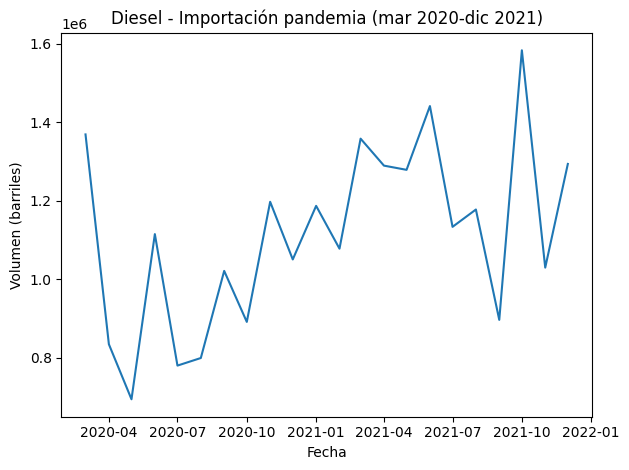

In [60]:
pandemia = df_importacion['2020-03':'2021-12']
for col in pandemia.columns:
    plt.figure()
    plt.plot(pandemia.index, pandemia[col])
    plt.title(f'{col} - Importación pandemia (mar 2020-dic 2021)')
    plt.xlabel('Fecha')
    plt.ylabel('Volumen (barriles)')
    plt.tight_layout()
    plt.show()

<small>

### Resultado sobre Importación durante Pandemia 

#### Gasolina regular:
Se observa una caída abrupta al inicio del periodo, coincidiendo con el inicio de la pandemia y las restricciones de movilidad. Sin embargo, después de los primeros meses, la importación muestra una recuperación progresiva y logra mantener volúmenes relativamente altos en el segundo año, lo que indica una adaptación del mercado a la nueva normalidad.

#### Gasolina superior:
La caída inicial fue aún más marcada que en la regular, llegando a valores muy bajos en mayo 2020. Posteriormente, hubo una fuerte recuperación que alcanzó un pico histórico en 2021, aunque seguida de una nueva baja. Esto refleja un comportamiento muy volátil, probablemente influenciado por la reducción del uso de vehículos de gama alta o cambios bruscos en la demanda.

#### Diésel:
Aunque el volumen también disminuyó en los primeros meses, la recuperación fue mucho más rápida y sostenida. La demanda se mantuvo alta y relativamente estable durante la pandemia, lo cual tiene sentido considerando su rol esencial en transporte de carga, servicios logísticos y actividades productivas que no se detuvieron del todo.

</small>

#### Exportar a CSVs

In [61]:
df_consumo.to_csv('df_consumo.csv', index=True)
df_importacion.to_csv('df_importacion.csv', index=True)
df_importacion_2025.to_csv('df_importacion_2025.csv', index=True)